# Participation rate ACT and SAT (short version)
In this project I will look at ACT and SAT participation rates and scores around the United States.<BR />
It will roughly be about Standardized Testing, Statistical Summaries and Inference.<BR />
No modelling!

Ends with a conclusion about the SAT participation rate and what can be next.<BR />

This is a shorter version. You can also see what happened step by step in an earlier post.<BR />
Note that this is the first project that I ever conducted so all the needed data science steps might not be there. Later projects will step by step become more advanced. 

## Libraries used
- Pandas
- Pyplot from Matplotlib
- Numpy
- Scipy from Stats

## About the data
I worked with 2 data sets. Both data sets was provided as .CSV files. 

**ACT**<BR />
Contains 52 rows and 8 columns.<br />
Every row is one state and the extra row contain a summarization for the Nation in total.<br />
<ins>Columns</ins>
- Unnamed:0 (numbers 0 to 51)
- State (name of the state)
- Participation (average participation rate in percentage)
- English (average english score)
- Math (average math score)
- Reading (average reading score)
- Science (average science score)
- Composite (average score out of the 4 test sections english, math, reading and science)

**SAT**<BR />
Contains 51 rows and 6 columns.<br />
Every row is one state.<br />
<ins>Columns</ins>
- Unnamed:0 (numbers 0 to 50)
- State (name of the state)
- Participation (average participation rate in percentage)
- Evidence-Based Reading and Writing
- Math (average math score)
- Total (average combined score for the 2 test sections)

**What did I have to fix?**<BR />
Participation columns in both data sets were not numeric. Special characters was removed and then the column values was converted from strings into numerics(floats). 

The extra National column in ACT was removed. 

I used dictionaries to structure the data and then I turned it into a nre data frame. 
The new data frame has one row for every state and the columns are the different parts for each test.
I also chosed to set the statenames as the index. (see the data frame below)

In [311]:
test_data.head()

,act_part,act_eng,act_math,act_read,act_sci,sat_part,sat_rnw,sat_math
states,,,,,,,,
Alabama,100,18.9,18.4,19.7,19.4,5,593,572
Alaska,65,18.7,19.8,20.4,19.9,38,547,533
Arizona,62,18.6,19.8,20.1,19.8,30,563,553
Arkansas,100,18.9,19,19.7,19.5,3,614,594
California,31,22.5,22.7,23.1,22.2,53,531,524


## Visualization and correlation

The distribution for each column was plotted in histograms using MatPlotLib and PyPlot.<BR />
Also create some scatter plots to look at the relationships. Some scores had to be normalized before plotting it.<BR />
I also made a subscatterplot with all the variables.
Barplots was also created for each variable.

**Correlation**<BR />
<ins>ACT</ins><BR />
There is a strong negativ correlation within ACT: 
- High participation -> low result score (especially for english, math and reading).

If you have low grades you do the test and hope for a good result. So you can try to apply to a school on your test score instead of your grades.

- Fewer participants -> higher scores

You are really good in a subject and have good grades, but want to get in to a specific school. Therefor you take the test.

<ins>SAT</ins><BR />
There is strong negativ correlation within SAT:
- High participation -> low result on reading and writing.

Same theory as above to why.

<ins>Participation rate in the 2 tests</ins><BR />
For the participation rate in the 2 tests it seems like if the participation rate is high in one test, it's low in the other. In other words it's a negativ correlation. 
Here you can explore more if you want to look more into the correlation.

**Average Participation rate for both tests**

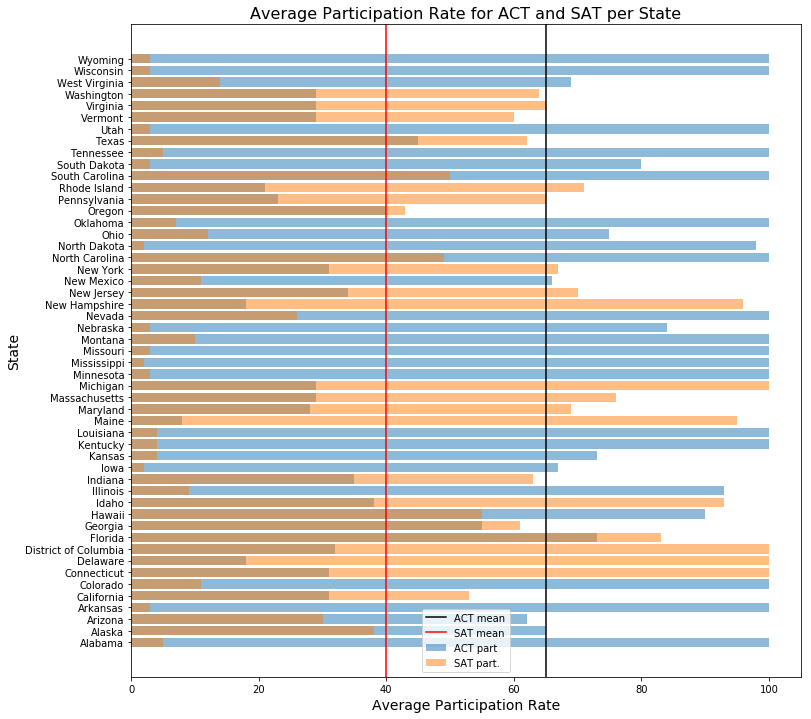

In [358]:
plt.subplots(figsize=(12,12))   # set a large canvas for plotting
plt.barh(test_data.index, test_data.act_part, label='ACT part', alpha=0.5)   #  make a bar graph
plt.barh(test_data.index, test_data.sat_part, label='SAT part.', alpha=0.5)
plt.axvline(65, label="ACT mean", color='k')  # make a vertical line
plt.axvline(40, label="SAT mean", color='red')  # make a vertical line
plt.legend(loc='lower center')
plt.title("Average Participation Rate for ACT and SAT per State", fontsize=16)
plt.xlabel("Average Participation Rate", fontsize=14)
plt.ylabel("State",fontsize=14)
plt.show()

## Descriptive and Inferential Statistics

**Distribution and relationships**<BR />
The distribution was summarized for mean (center), standard deviation (spread) and skewness (shape).

You can clearly see that there visualy seems to be a relation between some variables. All the column that are parts of the ACT. All the column that are parts of the SAT. However they are part of the same test and it can be other factors influencing them to move in the same direction.

I have instead chosen to study columns that kind of exsists in both test. Average participation rate, math and verbal(eng and read)/readandwrite. You can see a trend in all of them.

Correlation participation rate and columns from same test are interesting.

**Hypothesis test comparing the SAT and ACT participation rates.**<BR />
I conducted a Two-Sample $t$-test

$H_0:$ ```mean test_data.act_part```  =  ```mean test_data.sat_part```<BR />
$H_A:$ ```mean test_data.act_part```  !=  ```mean test_data.sat_part```

We established our significance level to be  $\alpha = 0.05$.
And we are assuming that the variables are independent 

The p-value came out as 0.00024134145562512704<br />
p < $\alpha$ -> we can reject $H_0$ (we can conclude that there are a different between average ACT participation rate and average SAT participation rate).<BR />
Not really mind blowing. 

**Correlation between SAT and ACT math scores.**<BR />
Quite weak negative correlation. The reason to why you wanted to check is that if there would have been a strong correlation you could have done something general in the society to affect the participationrate i both tests. Now it seems that one fix might not be beneficial for both test.

## Conclusion - Recommendation to SAT board

Start with looking more into SAT reading and writing part since that part in strongly negativly correlted with the SAT Average participation rate. <BR />
More participants -> lower scores in the reading and writing part<BR />
Less participants -> higher scores in the reading and writing part<BR />
The verbal parts between the two tests are not that strongly correlated. Therefor a directed effort might be need and not a broader approach.

Further start on focusing on states with low participation rate. For example Iowa, Mississippi, North Dakota and other states with low SAT participation rate. 
The participation rate for the two tests are high/low in different states. With that said it might be a attitude question among the schools or the students.

With more time you can dive deeper into this data, focusing more on specific correlation or what it looks like in specific states.

Further areas of interest:
- Survey (attitude of the students + do the schools ask for different things)
- Higher participation to any cost (lower scores?)
- Other countries (best practice studie)